#Setting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

#Dataset

In [ ]:
df = pd.read_csv("IG_Algorithm_Literacy_Exploratory.csv")
df.head()

,Unnamed: 0,Post,Subreddit,month_year,label1,Type
0,0,"First of all, there's no cost associated with ...",Entrepreneur,2016-08,sensemaking,comments
1,1,"First of all, there's no cost associated with ...",Entrepreneur,2016-08,sensemaking,comments
2,2,Instagram's algorithm is notoriously stupid an...,ArtistLounge,2021-02,"sensemaking, problem",comments
3,3,"True - it is not always the case, but it does ...",Instagram,2019-10,"sensemaking, problem",comments
4,4,"The only other thing I can think of, and sorry...",Instagram,2017-05,"sensemaking, problem",comments


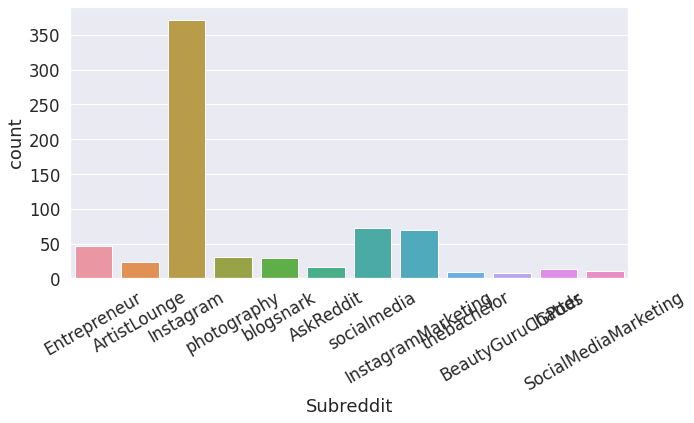

In [ ]:
plt.figure(figsize=(10,5))

chart = sns.countplot(
    data=df,
    
    x=df['Subreddit']
)

chart.set_xticklabels(chart.get_xticklabels(), rotation=30)

plt.show()

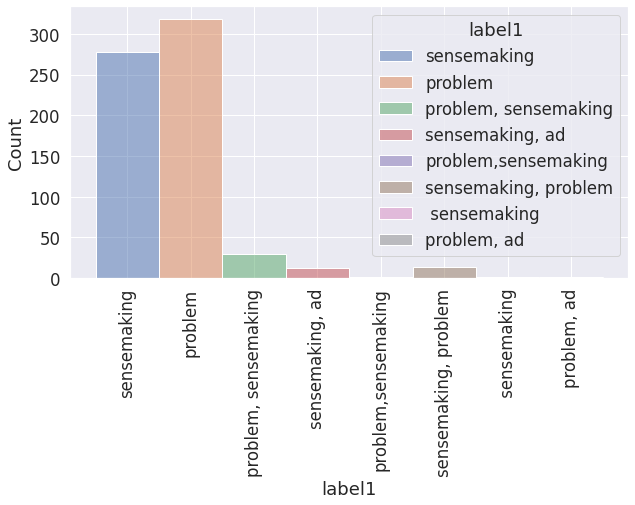

In [ ]:
plt.figure(figsize=(10,5))

chart = sns.histplot(
    data=df,   
    x=df['label1'],
    hue = df['label1']
)
labels = chart.get_xticklabels()

plt.xticks(rotation=90)


# plt.legend([],[], frameon=False)
# chart.set_xticklabels(labels, rotation=30)
# plt.legend(loc='upper left')
plt.show()

In [ ]:
df.shape

(704, 6)

In [ ]:
df.dtypes

Unnamed: 0     int64
Post          object
Subreddit     object
month_year    object
label1        object
Type          object
dtype: object

#Data cleaning

In [ ]:
#Delete the Special Characters
def clean(txt):
    txt = txt.str.replace("(<br/>)", "")
    txt = txt.str.replace('(<a).*(>).*(</a>)', '')
    txt = txt.str.replace('(&amp)', '')
    txt = txt.str.replace('(&gt)', '')
    txt = txt.str.replace('(&lt)', '')
    txt = txt.str.replace('(\xa0)', ' ')  
    return txt

df['Post'] = clean(df['Post'])

<ipython-input-74-ca48e71d9ece>:3: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = txt.str.replace("(<br/>)", "")
<ipython-input-74-ca48e71d9ece>:4: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = txt.str.replace('(<a).*(>).*(</a>)', '')
<ipython-input-74-ca48e71d9ece>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = txt.str.replace('(&amp)', '')
<ipython-input-74-ca48e71d9ece>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = txt.str.replace('(&gt)', '')
<ipython-input-74-ca48e71d9ece>:7: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = txt.str.replace('(&lt)', '')
<ipython-input-74-ca48e71d9ece>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  txt = txt.str.replace('(

In [ ]:
#Converting to lower case
df['Post1'] = df['Post'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df['Post1'].head()

0    first of all, there's no cost associated with ...
1    first of all, there's no cost associated with ...
2    instagram's algorithm is notoriously stupid an...
3    true - it is not always the case, but it does ...
4    the only other thing i can think of, and sorry...
Name: Post1, dtype: object

In [ ]:
#Removing the Punctuation
df['Post1'] = df['Post1'].str.replace('[^\w\s]', '')
df['Post1'].head()

<ipython-input-76-35c5f5a4f029>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Post1'] = df['Post1'].str.replace('[^\w\s]', '')


0    first of all theres no cost associated with ha...
1    first of all theres no cost associated with ha...
2    instagrams algorithm is notoriously stupid and...
3    true  it is not always the case but it does se...
4    the only other thing i can think of and sorry ...
Name: Post1, dtype: object

In [ ]:
#Removing Stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
df['Post1'] = df['Post1'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df['Post1'].head()

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0    first theres cost associated business account ...
1    first theres cost associated business account ...
2    instagrams algorithm notoriously stupid like c...
3    true always case seem happen often enough woul...
4    thing think sorry already said number follower...
Name: Post1, dtype: object

In [ ]:
#Remove the Rare Words 
#Some problems with the link Since links will provide the information whether it is ads or problem/sensemaking
freq = pd.Series(' '.join(df['Post1']).split()).value_counts()
less_freq = list(freq[freq ==1].index)
len(less_freq)

3164

There is a total of 3164 words in this list. If you notice most of these words even look wired. But there are some problems for posts with link, since when we click the link, it might provide other information

In [ ]:
#Let’s get rid of them from the post
df['Post1'] = df['Post1'].apply(lambda x: " ".join(x for x in x.split() if x not in less_freq))

In [ ]:
#Stemming and Lemmatization
#Stemming will cut down the parts like ‘ly’, ‘ing’, ‘ed’ from the words. We talked about it a bit before.
#The next step is lemmatization to bring the words in their root form. 
#You can choose either stemming or lemmatization. 
#After stemming, you may not see many changes in the lemmatization.
from nltk.stem import PorterStemmer
st = PorterStemmer()
df['Post1'] = df['Post1'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df['Post1']

0      first there cost associ busi account term pro ...
1      first there cost associ busi account term pro ...
2      instagram algorithm stupid like chanc post are...
3      true alway case seem happen often enough would...
4      thing think sorri alreadi said number engag lo...
                             ...                        
699    small art account 50 follow receiv like 1015 l...
700    one million follow instagram get post 100k vie...
701    let guy know theme page dedic subreddit call r...
702                                                 work
703    follow follow isnt your tri increas impress th...
Name: Post1, Length: 704, dtype: object

In [ ]:
# import nltk
# nltk.download('wordnet')
# nltk.download('omw-1.4')
# df['Post1'] = df['Post1'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
# df['Post1'].head()

In [ ]:
#remove common words: algorithm; instagram; post; account
df['Post1'] = df['Post1'].str.replace('algorithm', '')
df['Post1'] = df['Post1'].str.replace('instagram', '')
df['Post1'] = df['Post1'].str.replace('post', '')
df['Post1'] = df['Post1'].str.replace('account', '')

In [ ]:
#remove the punctuation again
df['Post1'] = df['Post1'].str.replace('[^\w\s]', '')
df['Post1'].head()

<ipython-input-83-cfdd45391781>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Post1'] = df['Post1'].str.replace('[^\w\s]', '')


0    first there cost associ busi  term pro squishy...
1    first there cost associ busi  term pro squishy...
2      stupid like chanc  arent even shown peopl fo...
3    true alway case seem happen often enough would...
4    thing think sorri alreadi said number engag lo...
Name: Post1, dtype: object

In [ ]:
df.count()

Unnamed: 0    704
Post          704
Subreddit     704
month_year    704
label1        704
Type          704
Post1         704
dtype: int64

#Data Analysis

In [ ]:
#adding some more features to the dataset
df['post_len'] = df['Post1'].astype(str).apply(len)
df['word_count'] = df['Post1'].apply(lambda x: len(str(x).split()))

In [ ]:
#Polarity - the value ranges from -1 to 1
# -1 represents the negative sentiment;
# 0 represents neutral;
# 1 represent positive sentiment;
#AWS comprehend
from textblob import TextBlob, Word, Blobber
df['polarity'] = df['Post1'].map(lambda text: TextBlob(text).sentiment.polarity)
df.head()

,Unnamed: 0,Post,Subreddit,month_year,label1,Type,Post1,post_len,word_count,polarity
0,0,"First of all, there's no cost associated with ...",Entrepreneur,2016-08,sensemaking,comments,first there cost associ busi term pro squishy...,481,77,0.148750
1,1,"First of all, there's no cost associated with ...",Entrepreneur,2016-08,sensemaking,comments,first there cost associ busi term pro squishy...,481,77,0.148750
2,2,Instagram's algorithm is notoriously stupid an...,ArtistLounge,2021-02,"sensemaking, problem",comments,stupid like chanc arent even shown peopl fo...,87,14,-0.331818
3,3,"True - it is not always the case, but it does ...",Instagram,2019-10,"sensemaking, problem",comments,true alway case seem happen often enough would...,495,89,0.148148
4,4,"The only other thing I can think of, and sorry...",Instagram,2017-05,"sensemaking, problem",comments,thing think sorri alreadi said number engag lo...,274,46,-0.050000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f79bf6dc220>,
      dtype=object)

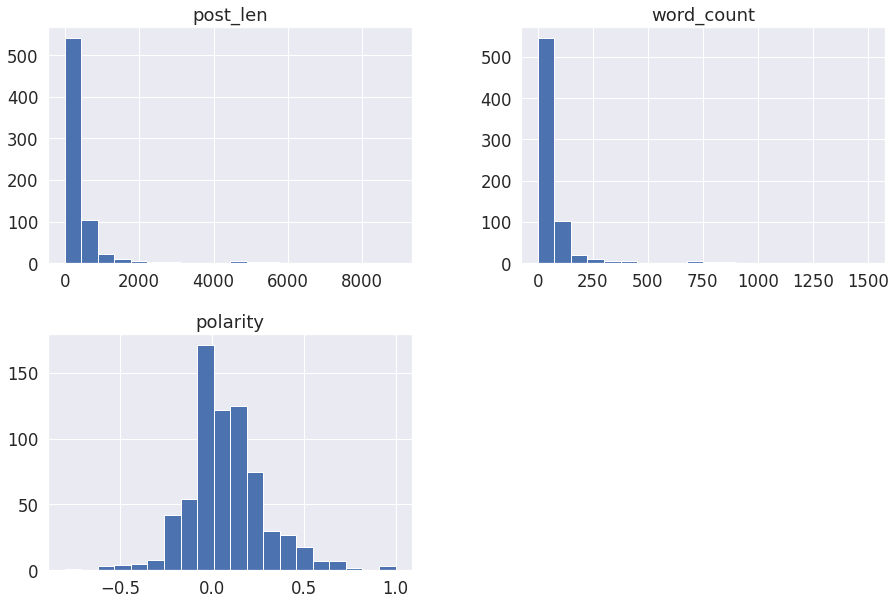

In [ ]:
#Distribution
df[["post_len", "word_count", "polarity"]].hist(bins=20, figsize=(15, 10))

The majority polarity is approximate or greater than zero. That means maximum posts have a netural or positive sentiment.

In [ ]:
#filter labels
df['label_filter'] = df['label1'].str.replace(',',' ').str.split()
df['label_filter']

0               [sensemaking]
1               [sensemaking]
2      [sensemaking, problem]
3      [sensemaking, problem]
4      [sensemaking, problem]
                ...          
699                 [problem]
700                 [problem]
701         [ad, sensemaking]
702                 [problem]
703         [ad, sensemaking]
Name: label_filter, Length: 704, dtype: object

In [ ]:
for i in range(len(df['label_filter'])):
  df['label_filter'][i] = df['label_filter'][i][0]
df['label_filter']

<ipython-input-89-f3752d785727>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label_filter'][i] = df['label_filter'][i][0]


0      sensemaking
1      sensemaking
2      sensemaking
3      sensemaking
4      sensemaking
          ...     
699        problem
700        problem
701             ad
702        problem
703             ad
Name: label_filter, Length: 704, dtype: object

In [ ]:
#Time span and labels - Errors
# df_sensemaking = df[df['label_filter'] == 'sensemaking'] 
# df_sensemaking['year'] = pd.to_datetime(df_sensemaking['month_year']).dt.to_period('Y')
# # pd.plotting.register_matplotlib_converters()
# plt.plot(df_sensemaking['year'], df_sensemaking.label_filter, label='label_filter', 
#          linewidth=3)
# # plt.plot(df2.date, df2.blogs_unread, color='red', 
# #          label='blogs_unread', linewidth=3)

# # Labelling 
# plt.xlabel("Year")
# plt.ylabel("Counts")
# plt.title("Counts of labels and time span")

# # Display

In [ ]:
#extract year from month_year
import datetime
df['year'] = df['month_year'].str[:4]
df = df.sort_values(by = 'year')

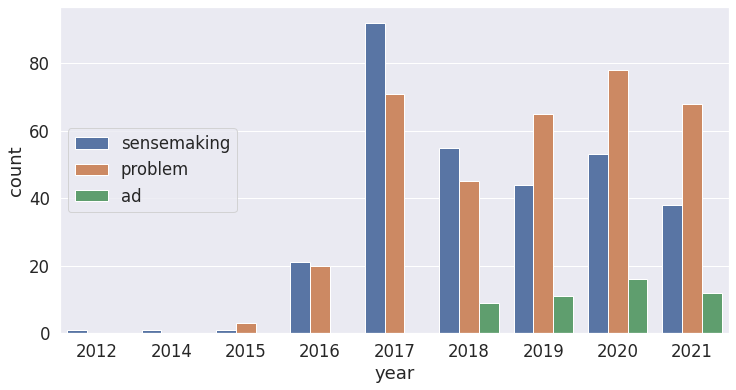

In [ ]:
#plot the labels trend over time
fig, ax = plt.subplots(figsize=(12,6))
sns.countplot(data=df, x='year', hue='label_filter', ax=ax)
plt.legend(loc='center left')

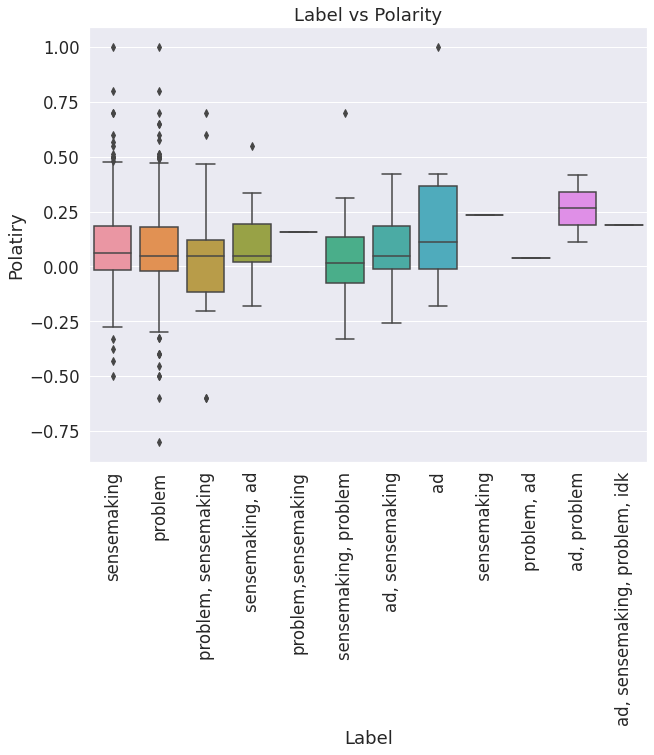

In [ ]:
#Polarity vs Label

plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x = 'label1', y = 'polarity', data = df)
plt.xticks(rotation=90)
plt.xlabel("Label")
plt.ylabel("Polatiry")
plt.title("Label vs Polarity")
plt.show()

Cannot see label clearly so we use filtered labels

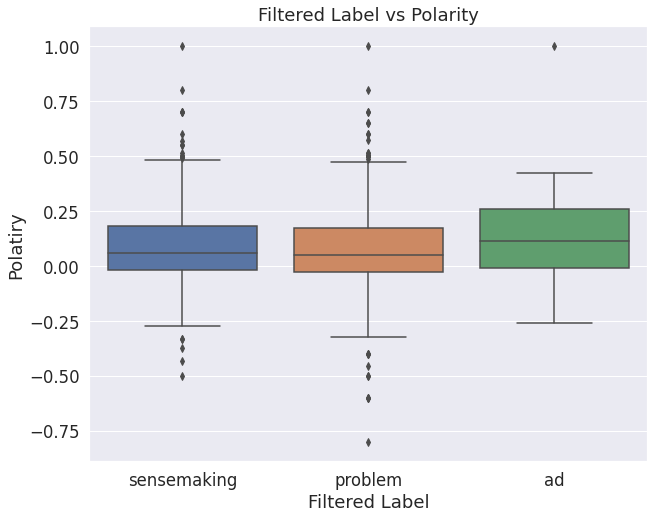

In [ ]:
plt.figure(figsize = (10, 8))
sns.set_style('whitegrid')
sns.set(font_scale = 1.5)
sns.boxplot(x = 'label_filter', y = 'polarity', data = df)
plt.xlabel("Filtered Label")
plt.ylabel("Polatiry")
plt.title("Filtered Label vs Polarity")
plt.show()

Mean polarity for sensemaking label is a little bit higher than that of problem label. There are a lot of outliers in problem and sensemaking though. Maybe looking at those will help.



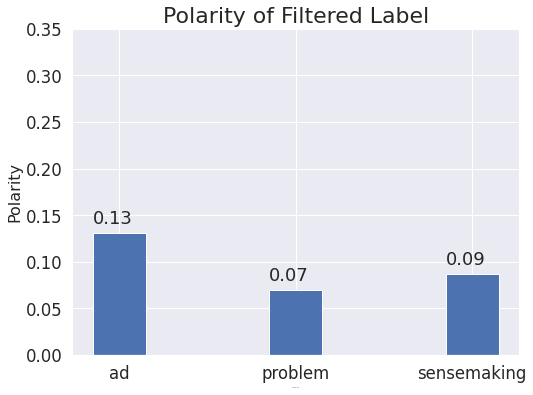

In [ ]:
mean_pol = df.groupby('label_filter')['polarity'].agg([np.mean])
mean_pol.columns = ['mean_polarity']
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(mean_pol.index, mean_pol.mean_polarity, width=0.3)
#plt.gca().set_xticklabels(mean_pol.index, fontdict={'size': 14})
    
for i in ax.patches:
    ax.text(i.get_x(), i.get_height()+0.01, str("{:.2f}".format(i.get_height())))
plt.title("Polarity of Filtered Label", fontsize=22)
plt.ylabel("Polarity", fontsize=16)
plt.xlabel("Filtered Label", fontsize=1)
plt.ylim(0, 0.35)
plt.show()

I was expecting problem labels have a polarity of close to -1. But look like it is closer to 0.1. That means thost post may not have that many negative words in it. I am guessing it just by looking at the polarity. The polarity for sensemaking is similar to problem label, which we need to concern about it. Basic sentiment analysis might not work at this point.

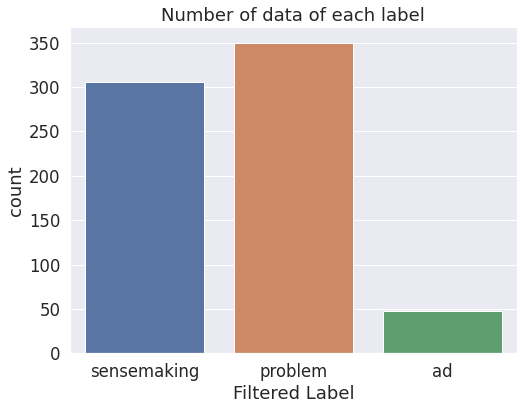

In [ ]:
#Count of the Posts for Each filtered Label
plt.figure(figsize=(8, 6))
sns.countplot(x='label_filter', data=df)
plt.xlabel("Filtered Label")
plt.title("Number of data of each label")
plt.show()

In [ ]:
df['label_filter'].value_counts()

problem        350
sensemaking    306
ad              48
Name: label_filter, dtype: int64

Most of the posts of the dataset have a problem label

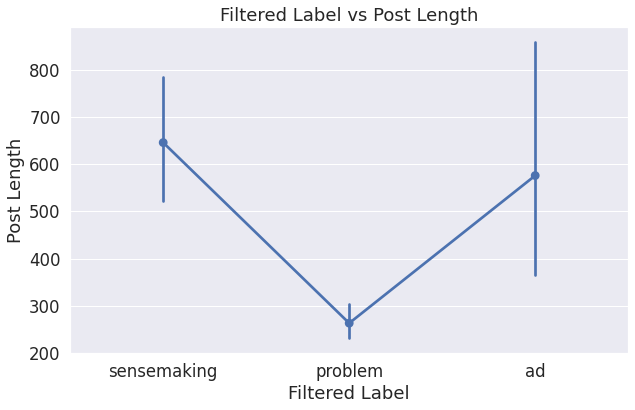

In [ ]:
#Length of the Post vs the Filtered Label
plt.figure(figsize=(10, 6))
sns.pointplot(x = "label_filter", y = "post_len", data = df)
plt.xlabel("Filtered Label")
plt.ylabel("Post Length")
plt.title("Filtered Label vs Post Length")
plt.show()

The result expect my expection. When it comes to label of problem, post length significantly goes down. So, when our stakeholders were not feel happy about instagram algorithm, they didn’t write too much! Conversely, when people try to make sense of what is instagram algorithm or post ad on it, posts have longer length.

In [ ]:
#Top 20 products based on the Polarity
product_pol = df.groupby('Type')['polarity'].agg([np.mean])
product_pol.columns = ['polarity']
product_pol = product_pol.sort_values('polarity', ascending=False)
product_pol = product_pol.head(20)
product_pol

,polarity
Type,
submissions,0.088609
comments,0.075475


The polarity for both submission and comments is similar

In [ ]:
#WordCloud for ALL
#combined all the texts in the post1 column to made a bid text block
import re  
import matplotlib.pyplot as plt  
from wordcloud import WordCloud, STOPWORDS  
text = " ".join(post for post in df.Post1)

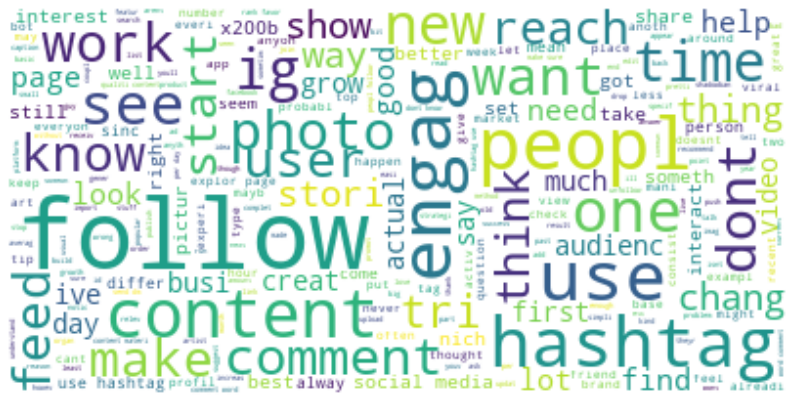

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])

wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Word cloud for sensemaking
df_sensemaking = df[df['label_filter'] == 'sensemaking'] 
text_sensemaking = " ".join(post for post in df_sensemaking.Post1)

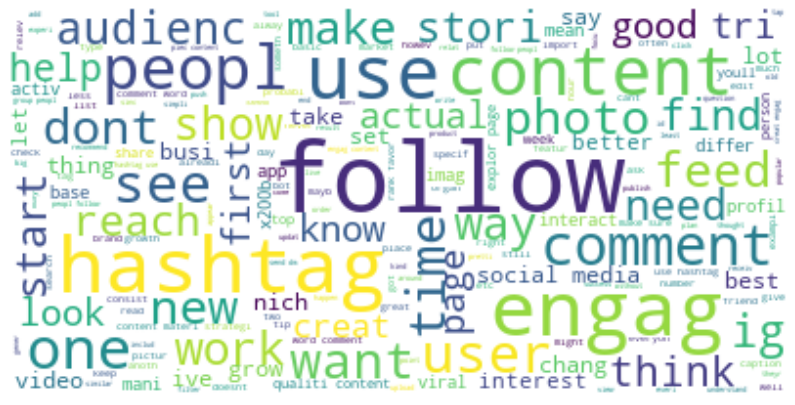

In [ ]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])

wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text_sensemaking)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

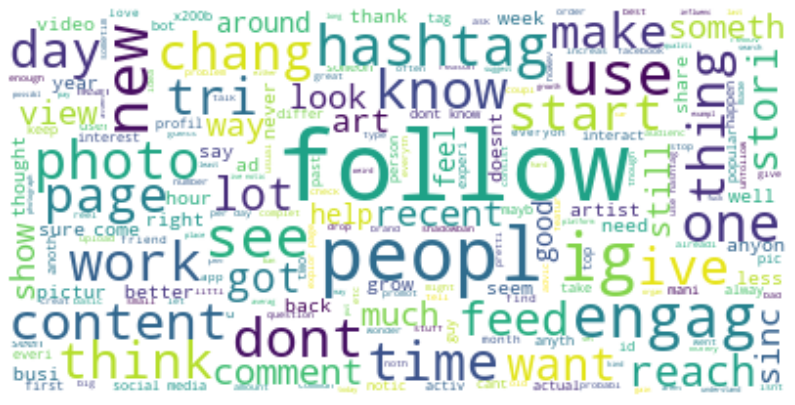

In [ ]:
#wordCloud for problem label
df_problem = df[df['label_filter'] == 'problem'] 
text_problem = " ".join(post for post in df_problem.Post1)

stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])

wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text_problem)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

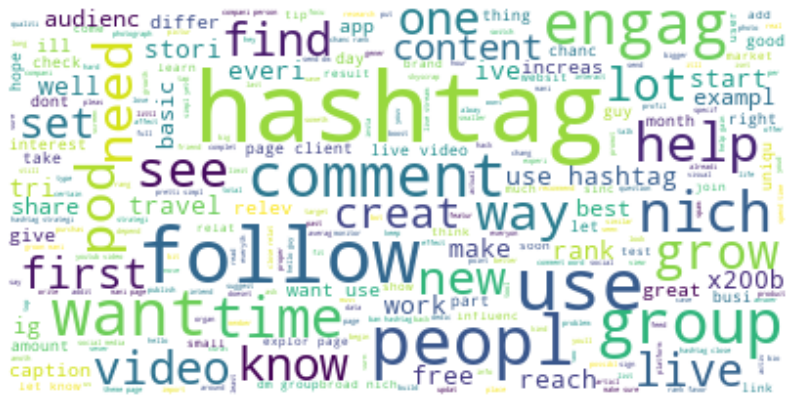

In [ ]:
#wordCloud for ad label
df_ad = df[df['label_filter'] == 'ad'] 
text_ad = " ".join(post for post in df_ad.Post1)

stopwords = set(STOPWORDS)
stopwords = stopwords.union(["ha", "thi", "now", "onli", "im", "becaus", "wa", "will", "even", "go", "realli", "didnt", "abl"])

wordcl = WordCloud(stopwords = stopwords, background_color='white', max_font_size = 50, max_words = 5000).generate(text_ad)
plt.figure(figsize=(14, 12))
plt.imshow(wordcl, interpolation='bilinear')
plt.axis('off')
plt.show()

it seems like no huge differences wordcloud for post between the sensemaking and problem. But for ad, a huge Hashtag word appears which is different from other labels.

In [ ]:
#Frequency Charts for all
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(df['Post1'], 20)
df1 = pd.DataFrame(common_words, columns = ['Post', 'count'])
df1.head()

,Post,count
0,follow,1181
1,like,1122
2,hashtag,721
3,engag,694
4,get,690


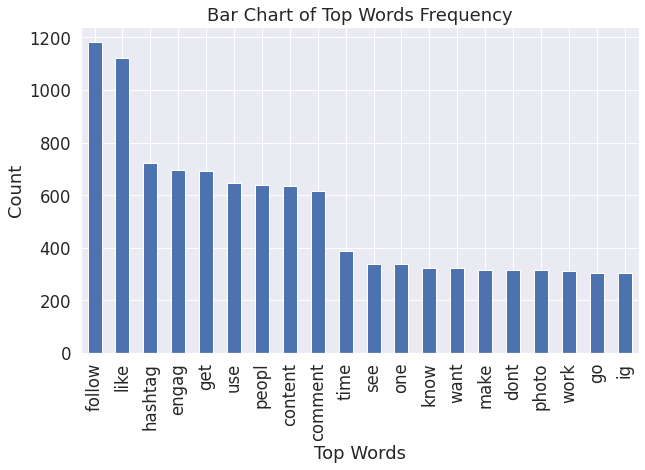

In [ ]:
#Frequency bar chart for all labels
df1.groupby('Post').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

In [ ]:
#separate each label dataframes
df_problem = df[df['label_filter'] == 'problem']
df_sensemaking = df[df['label_filter'] == 'sensemaking']
df_ad = df[df['label_filter'] == 'ad']

In [ ]:
#frequency chart of post in problem labels 
common_words = get_top_n_words(df_problem['Post1'], 20)
df_problem1 = pd.DataFrame(common_words, columns = ['Post', 'count'])
df_problem1.head()

,Post,count
0,like,403
1,follow,396
2,get,263
3,peopl,197
4,ig,163


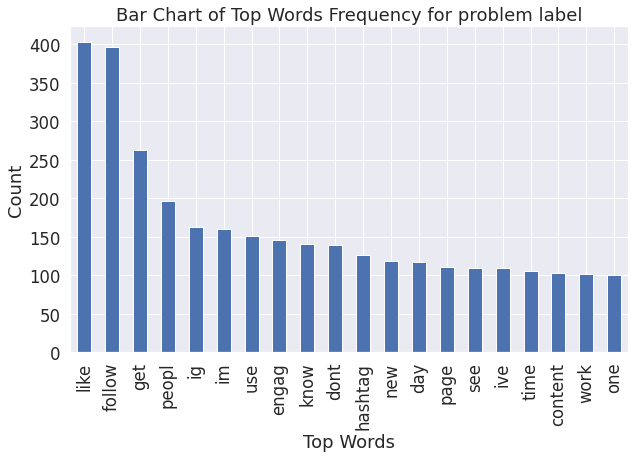

In [ ]:
df_problem1.groupby('Post').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency for problem label"
)

In [ ]:
#frequency chart of post in sensemaking labels 
common_words = get_top_n_words(df_sensemaking['Post1'], 20)
df_sensemaking1 = pd.DataFrame(common_words, columns = ['Post', 'count'])
df_sensemaking1.head()

,Post,count
0,follow,716
1,like,655
2,comment,514
3,content,513
4,engag,505


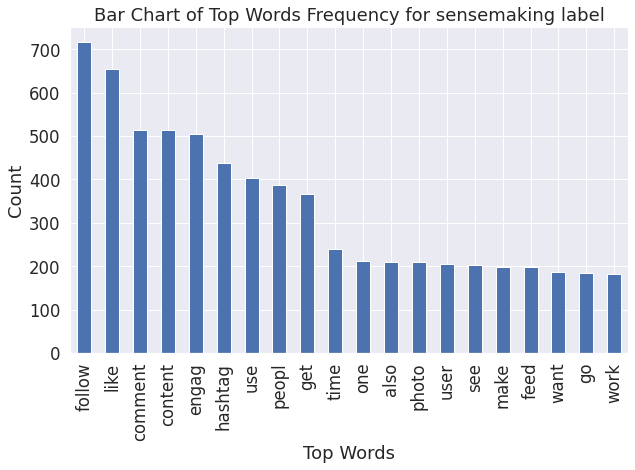

In [ ]:
df_sensemaking1.groupby('Post').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency for sensemaking label"
)

In [ ]:
#frequency chart of post in ad labels 
common_words = get_top_n_words(df_ad['Post1'], 20)
df_ad1 = pd.DataFrame(common_words, columns = ['Post', 'count'])
df_ad1.head()

,Post,count
0,hashtag,158
1,use,91
2,follow,69
3,like,64
4,get,60


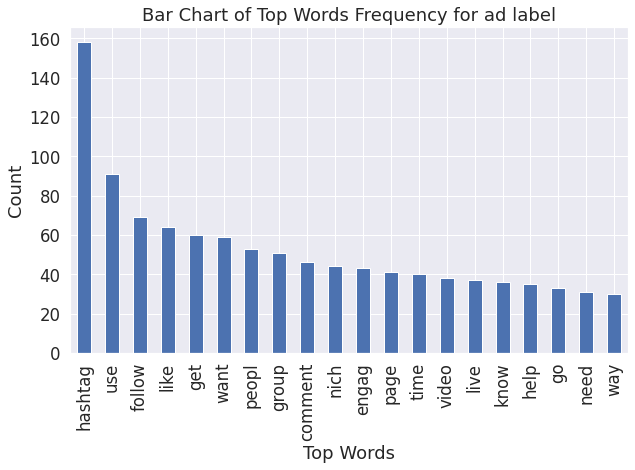

In [ ]:
df_ad1.groupby('Post').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency for ad label"
)

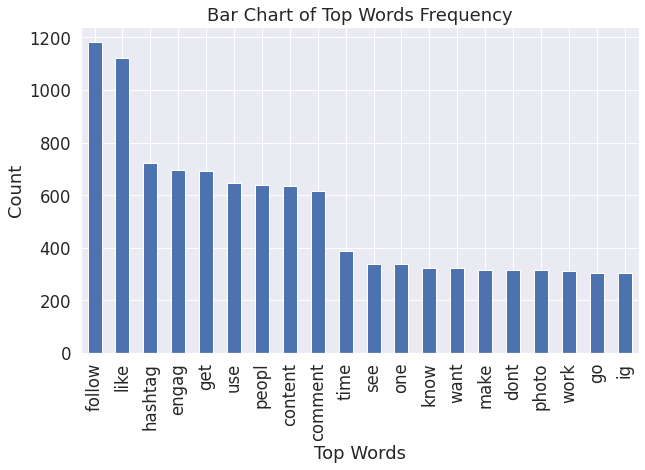

In [ ]:
df1.groupby('Post').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

Maybe I should get rid of conjection words preposition or subject words?

In [ ]:

#These are the topmost occurring words in the reviews. 
#But instead of just seeing one word two consecutive words or three consecutive words are more helpful. 
#They provide some meaning. 
#The following plot shows the topmost frequent bigrams:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2,2)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words2 = get_top_n_bigram(df['Post1'], 30)
df2 = pd.DataFrame(common_words2, columns=['Post', "Count"])
df2.head()

,Post,Count
0,like comment,116
1,social media,106
2,explor page,84
3,use hashtag,67
4,qualiti content,59


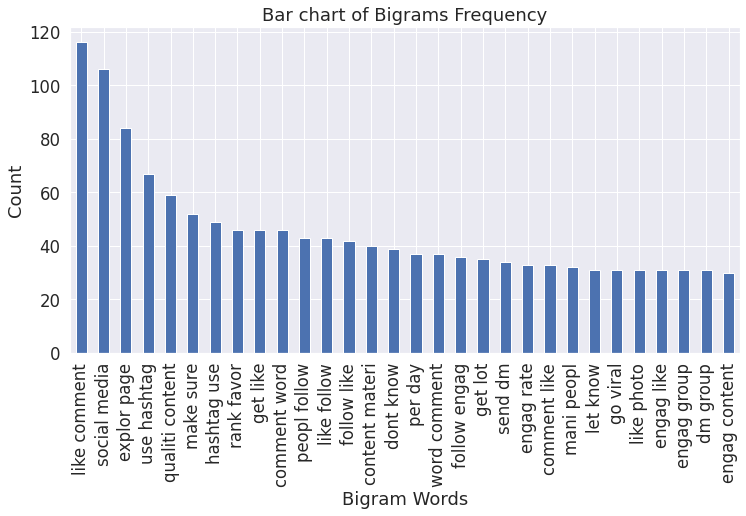

In [ ]:
df2.groupby('Post').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Bigram Words",
    ylabel = "Count",
    title = "Bar chart of Bigrams Frequency"
)

Both separate and combine the instagram and algorithm have high counts

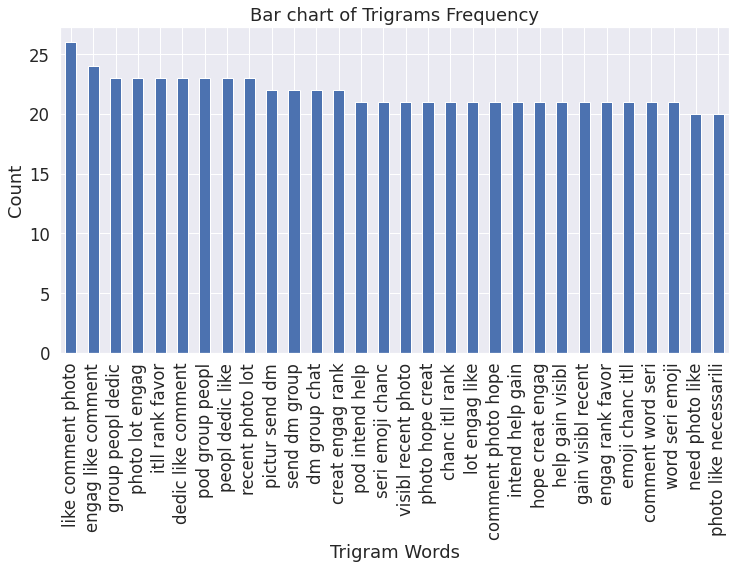

In [ ]:
# The trigrams might will provide us some more ideas about what people are saying in the reviews.
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words3 = get_top_n_trigram(df['Post1'], 30)
df3 = pd.DataFrame(common_words3, columns = ['Post' , 'Count'])
df3.groupby('Post').sum()['Count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(12,6),
    xlabel = "Trigram Words",
    ylabel = "Count",
    title = "Bar chart of Trigrams Frequency"
)

The trigrams mostly contain words: algorithm and instagram. But they also contain photo, pictures, post, group. I think the reason for this is because of the repetitive posts of Ads. For example, I see phrase like "pod group people", "algorithm pod intend", "pod intend help" which is an Ads. For the picture and post, due to the instagram is photo and picture-based sharing social app; thus people talk a lot about it.

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


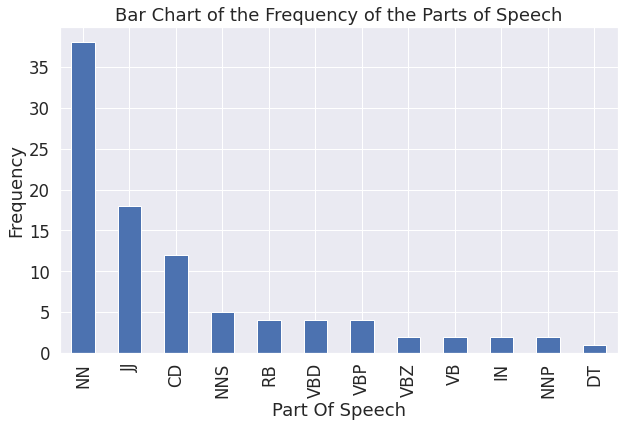

In [ ]:
#Part-of -Speech Tagging
#This is a process of tagging the words with the part of speech such as nouns, 
#pronouns, verbs, adjectives, etc. It can be done easily using TextBlob API.
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

blob = TextBlob(str(df['Post1']))
pos_df = pd.DataFrame(blob.tags, columns = ['word', 'pos'])
pos_df = pos_df.pos.value_counts()[:30]
pos_df.plot(kind='bar',
            xlabel = "Part Of Speech",
           ylabel = "Frequency",
           title = "Bar Chart of the Frequency of the Parts of Speech",
           figsize=(10, 6))

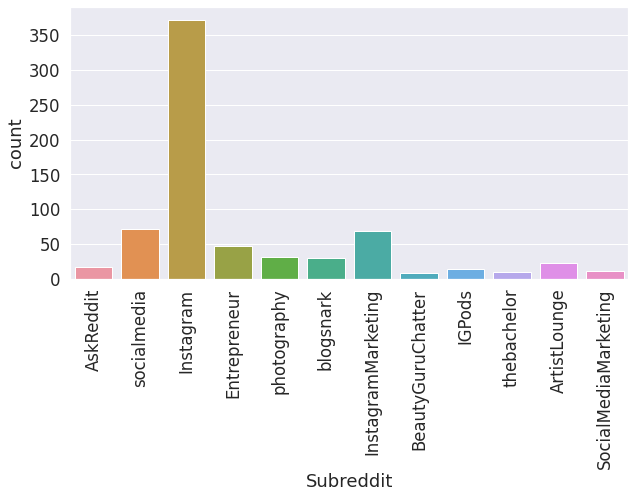

In [ ]:
#Top Subreddits
plt.figure(figsize=(10,5))

chart = sns.countplot(
    data=df,
    
    x=df['Subreddit']
)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
plt.show()

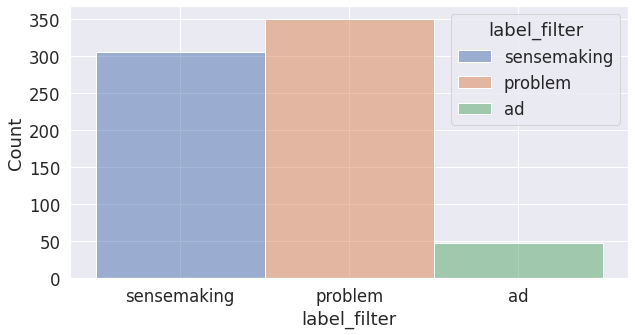

In [ ]:
plt.figure(figsize=(10,5))

chart = sns.histplot(
    data=df,   
    x=df['label_filter'],
    hue = df['label_filter']
)
labels = chart.get_xticklabels()

plt.show()

#Sentiment Analysis

In [ ]:
#get rid of ad label
#give problem and sensemaking in filtered label 0 and 1 respectively
df = df[df['label_filter'] != 'ad']
df['label2'] = df['label_filter'].map(dict(problem=0, sensemaking=1, ad=2))
df

<ipython-input-122-470c3be08731>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label2'] = df['label_filter'].map(dict(problem=0, sensemaking=1, ad=2))


,Unnamed: 0,Post,Subreddit,month_year,label1,Type,Post1,post_len,word_count,polarity,label_filter,year,label2
65,65,the instagram algorithm has a time-from-image-...,AskReddit,2012-04,sensemaking,comments,variabl calcul filter amount ye imag time,43,7,0.000000,sensemaking,2012,1
434,44,Since Instagram took the social media world by...,socialmedia,2014-09,sensemaking,submissions,sinc took social media world ive research soc...,195,31,0.063333,sensemaking,2014,1
495,105,Did instagram change their algorithm yesterday...,Instagram,2015-08,problem,submissions,chang yesterday photo get significantli les...,94,14,-0.083333,problem,2015,0
151,151,[Quick Google search doesn't show anything imp...,Entrepreneur,2015-04,problem,comments,quick googl search doesnt show anyth import en...,114,19,0.166667,problem,2015,0
150,150,"First and foremost, you either gotta stick it ...",photography,2015-11,problem,comments,first either gotta stick spread word mouth har...,504,81,0.141667,problem,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
595,237,Did this person search for my Instagram profil...,Instagram,2021-01,problem,submissions,person search profil here stori went date guy...,798,142,0.072421,problem,2021,0
269,272,I think it’s as simple as the fact that the st...,Instagram,2021-10,sensemaking,comments,think simpl fact stori right top start view on...,129,24,0.261905,sensemaking,2021,1
259,262,I have not posted on insta for over a year and...,Instagram,2021-05,problem,comments,insta year appar collabor reach commiss deal ...,190,31,-0.200000,problem,2021,0
462,72,Instagram Algorithm Has Defeated Me\n\nOk so l...,Instagram,2021-02,problem,submissions,defeat ok like everyon els hate 2021 thing...,749,127,-0.001979,problem,2021,0


In [ ]:
#add subreddit as a feature
def combined_features(row):
    return row['Subreddit'] + ' '+ row['Post1']
df['all_features'] = df.apply(combined_features, axis=1)
df.head()

,Unnamed: 0,Post,Subreddit,month_year,label1,Type,Post1,post_len,word_count,polarity,label_filter,year,label2,all_features
65,65,the instagram algorithm has a time-from-image-...,AskReddit,2012-04,sensemaking,comments,variabl calcul filter amount ye imag time,43,7,0.000000,sensemaking,2012,1,AskReddit variabl calcul filter amount ye im...
434,44,Since Instagram took the social media world by...,socialmedia,2014-09,sensemaking,submissions,sinc took social media world ive research soc...,195,31,0.063333,sensemaking,2014,1,socialmedia sinc took social media world ive ...
495,105,Did instagram change their algorithm yesterday...,Instagram,2015-08,problem,submissions,chang yesterday photo get significantli les...,94,14,-0.083333,problem,2015,0,Instagram chang yesterday photo get signifi...
151,151,[Quick Google search doesn't show anything imp...,Entrepreneur,2015-04,problem,comments,quick googl search doesnt show anyth import en...,114,19,0.166667,problem,2015,0,Entrepreneur quick googl search doesnt show an...
150,150,"First and foremost, you either gotta stick it ...",photography,2015-11,problem,comments,first either gotta stick spread word mouth har...,504,81,0.141667,problem,2015,0,photography first either gotta stick spread wo...


In [ ]:
#X should be the ‘all_features’ column and y should be our number to represent sensemaking and problem column
X = df['all_features']
y = df['label2']

In [ ]:
#Train Data: ‘train_test_split’ automatically splits the data in 75/25 proportion. 75% for the training and 25% for the testing.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [ ]:
#CountVectorizer develops a vector of all the words in the string. 
#Import CountVectorizer and fit both our training, testing data into it.
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)

In [ ]:
#Logistic Regression as this is a binary classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(ctmTr, y_train)

LogisticRegression()

In [ ]:
y_pred_class = model.predict(X_test_dtm)

In [ ]:
accuracy_score(y_test, y_pred_class)

0.7621951219512195

The accuracy score I got for this data on the test set is 79.27%, which is even higher than BERT and Naive Bayes??? 

In [ ]:
#X should be the preprocessing Post1 column without adding new feature 
#y should be our number to represent sensemaking and problem column
X = df['Post1']
y = df['label2']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(ctmTr, y_train)
y_pred_class = model.predict(X_test_dtm)
accuracy_score(y_test, y_pred_class)

0.7378048780487805

With preprocessing data for Post, the accuracy score I got for this data on the test set is 78.05%, which is the highest so far

In [ ]:
#Without preprocessing post in X and labels in y
X = df['Post']
y = df['label2']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
ctmTr = cv.fit_transform(X_train)
X_test_dtm = cv.transform(X_test)
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(ctmTr, y_train)
y_pred_class = model.predict(X_test_dtm)
accuracy_score(y_test, y_pred_class)

0.7987804878048781

Without any preprocessing of Post data, the accuracy score I got for this data on the test set is 79.88%, which is the highest so far

In [ ]:
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
print('Confusion Matrix : \n')
predictions = model.predict(X_test_dtm)

#printing the confusion matrix, classification report, and test accuracy
print(confusion_matrix(y_test, y_pred_class))
print(classification_report(y_test, y_pred_class))
print(accuracy_score(y_test, y_pred_class))

Confusion Matrix : 

[[78  7]
 [26 53]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        85
           1       0.88      0.67      0.76        79

    accuracy                           0.80       164
   macro avg       0.82      0.79      0.79       164
weighted avg       0.81      0.80      0.80       164

0.7987804878048781
